In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import networkx as nx
import pickle


### Initial data load

First, we get the names of all the Pokémon, and append these to a list.

In [4]:
data = requests.get('https://pokeapi.co/api/v2/pokemon?limit=1000')

In [5]:
data2 = data.json()

In [6]:
data3 = data2['results']

In [7]:
pokemons = []
# get the name of the pokemon
for i in range(len(data3)):
    pokemons.append(data3[i]['name'])

In [8]:
pokemons

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie',
 'metapod',
 'butterfree',
 'weedle',
 'kakuna',
 'beedrill',
 'pidgey',
 'pidgeotto',
 'pidgeot',
 'rattata',
 'raticate',
 'spearow',
 'fearow',
 'ekans',
 'arbok',
 'pikachu',
 'raichu',
 'sandshrew',
 'sandslash',
 'nidoran-f',
 'nidorina',
 'nidoqueen',
 'nidoran-m',
 'nidorino',
 'nidoking',
 'clefairy',
 'clefable',
 'vulpix',
 'ninetales',
 'jigglypuff',
 'wigglytuff',
 'zubat',
 'golbat',
 'oddish',
 'gloom',
 'vileplume',
 'paras',
 'parasect',
 'venonat',
 'venomoth',
 'diglett',
 'dugtrio',
 'meowth',
 'persian',
 'psyduck',
 'golduck',
 'mankey',
 'primeape',
 'growlithe',
 'arcanine',
 'poliwag',
 'poliwhirl',
 'poliwrath',
 'abra',
 'kadabra',
 'alakazam',
 'machop',
 'machoke',
 'machamp',
 'bellsprout',
 'weepinbell',
 'victreebel',
 'tentacool',
 'tentacruel',
 'geodude',
 'graveler',
 'golem',
 'ponyta',
 'rapidash',
 'slowpoke',
 '

### Data Set Creation

Second, we must request the API for each Pokémon, to get the abilities, types, egg groups, moves and Pokédex entries.

In [9]:
def data_scrape():
    temp_dict = {
        'pokemon': [],
        'abilities': [], 
        'types': [], 
        'egg_groups': [], 
        'moves': [],
        'pokedex_entry': []
    }
    
    for i, name in tqdm(enumerate(pokemons)):
        r = requests.get('https://pokeapi.co/api/v2/pokemon/' + str(i+1)).json()
        # append the name of the pokemon
        temp_dict['pokemon'].append(name)

        # append the abilities of the pokemon
        abilities = [r['abilities'][j]['ability']['name'] for j in range(len(r['abilities']))]
        temp_dict['abilities'].append(abilities)

        # append the types of the pokemon
        types = [r['types'][i]['type']['name'] for i in range(len(r['types']))]
        temp_dict['types'].append(types)

        # append the moves of the pokemon
        moves = [r['moves'][j]['move']['name'] for j in range(len(r['moves']))]
        temp_dict['moves'].append(moves)

        # make new request to get the egg groups and pokedex entry
        r = requests.get('https://pokeapi.co/api/v2/pokemon-species/' + str(i+1)).json()

        # append the egg groups of the pokemon
        egg_groups = [r['egg_groups'][j]['name'] for j in range(len(r['egg_groups']))]
        temp_dict['egg_groups'].append(egg_groups)

        # append the pokedex entry of the pokemon
        entry = r['flavor_text_entries'][0]['flavor_text'].replace('\n', ' ').replace('\f', ' ') if len(r['flavor_text_entries']) > 0 else None
        temp_dict['pokedex_entry'].append(entry)
        

    print('Done!')

    return temp_dict
    

In [10]:
if not os.path.exists('pokemon.pickle'):     
    print('Scraping data...')
    poke_dict = data_scrape()


### Make the dataframe

In [11]:
poke_df = pd.DataFrame(poke_dict) if not os.path.exists('pokemon.pickle') else pd.read_pickle('pokemon.pickle')

poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pokemon        1000 non-null   object
 1   abilities      1000 non-null   object
 2   types          1000 non-null   object
 3   egg_groups     1000 non-null   object
 4   moves          1000 non-null   object
 5   pokedex_entry  905 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


In [12]:
# save to pickle
poke_df.to_pickle('pokemon.pickle') if not os.path.exists('pokemon.pickle') else print('File already exists')

File already exists


In [13]:
# Remove null values
poke_df_clean = poke_df.dropna()
poke_df_clean['pokemon'] = poke_df_clean['pokemon'].str.capitalize()

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_74737/4214421345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke_df_clean['pokemon'] = poke_df_clean['pokemon'].str.capitalize()


In [14]:
poke_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 904
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pokemon        905 non-null    object
 1   abilities      905 non-null    object
 2   types          905 non-null    object
 3   egg_groups     905 non-null    object
 4   moves          905 non-null    object
 5   pokedex_entry  905 non-null    object
dtypes: object(6)
memory usage: 49.5+ KB


In [15]:
# save to csv again
poke_df_clean.to_pickle('pokemon_clean.pickle') if not os.path.exists('pokemon_clean.pickle') else print('File already exists')

File already exists


In [16]:
poke_df_clean.columns

Index(['pokemon', 'abilities', 'types', 'egg_groups', 'moves',
       'pokedex_entry'],
      dtype='object')

First, we get all the unique abilities, types, egg groups and moves.

In [17]:
def find_unique(df, col):
    vals = df[col].values
    all_vals = [item for sublist in vals for item in sublist]
    unique_vals = list(set(all_vals))
    return unique_vals

In [18]:
unique_abilities = find_unique(poke_df_clean, 'abilities')
unique_types = find_unique(poke_df_clean, 'types')
unique_egg_groups = find_unique(poke_df_clean, 'egg_groups')
unique_moves = find_unique(poke_df_clean, 'moves')

In [19]:
print('Number of unique abilities: ', len(unique_abilities))
print('Number of unique types: ', len(unique_types))
print('Number of unique egg groups: ', len(unique_egg_groups))
print('Number of unique moves: ', len(unique_moves))

Number of unique abilities:  249
Number of unique types:  18
Number of unique egg groups:  15
Number of unique moves:  747


In [20]:
# Time to get the text entries for each ability, and move
def get_text_entries(attribute, unique_vals):
    temp_dict = {
        attribute: [],
        'text_entry': []
    }

    for i, val in tqdm(enumerate(unique_vals)):
        r = requests.get('https://pokeapi.co/api/v2/' + attribute + '/' + val).json()
        
        # check if the text entry exists in english
        if len(r['effect_entries']) == 0:
            for j in range(len(r['flavor_text_entries'])):
                if r['flavor_text_entries'][j]['language']['name'] == 'en':
                    temp_dict[attribute].append(val)
                    temp_dict['text_entry'].append(r['flavor_text_entries'][j]['flavor_text'].replace('\n', ' ').replace('\f', ' '))
                    break
        else:
            for j in range(len(r['effect_entries'])):
                if r['effect_entries'][j]['language']['name'] == 'en':
                    temp_dict[attribute].append(val)
                    temp_dict['text_entry'].append(r['effect_entries'][j]['effect'].replace('\n', ' ').replace('\f', ' '))
                    break

    return temp_dict

In [21]:
if not os.path.exists('ability_dict.pickle'):
    ability_dict = get_text_entries('ability', unique_abilities)
    ability_df = pd.DataFrame(ability_dict)
    ability_df.to_pickle('ability_dict.pickle')
else:
    ability_df = pd.read_pickle('ability_dict.pickle')

In [22]:
if not os.path.exists('move_dict.pickle'):
    move_dict = get_text_entries('move', unique_moves)
    move_df = pd.DataFrame(move_dict)
    move_df.to_pickle('move_dict.pickle')
else:
    move_df = pd.read_pickle('move_dict.pickle')

We might experience that not all abilities nor moves have text, and we will check that here.

In [23]:
# find the missing abilities
missing_abilities = [x for x in unique_abilities if x not in ability_df['ability'].values.tolist()]

# find the missing moves
missing_moves = [x for x in unique_moves if x not in move_df['move'].values.tolist()]


In [24]:
# print number of missing abilities and moves
print('Number of missing abilities: ', len(missing_abilities))
print('Number of missing moves: ', len(missing_moves))

Number of missing abilities:  1
Number of missing moves:  29


In [25]:
# update the unique abilities and moves lists to not include the missing ones
unique_abilities = [x for x in unique_abilities if x not in missing_abilities]
unique_moves = [x for x in unique_moves if x not in missing_moves]

# print number of unique abilities and moves
print('Number of unique abilities: ', len(unique_abilities))
print('Number of unique moves: ', len(unique_moves))

Number of unique abilities:  248
Number of unique moves:  718


This concludes the data collection part of this project. To briefly summarise the data, we have:

In [26]:
# summarize the data
print('Number of pokemon: ', len(poke_df_clean))
print('Number of unique abilities: ', len(unique_abilities))
print('Number of unique types: ', len(unique_types))
print('Number of unique egg groups: ', len(unique_egg_groups))
print('Number of unique moves: ', len(unique_moves))

Number of pokemon:  905
Number of unique abilities:  248
Number of unique types:  18
Number of unique egg groups:  15
Number of unique moves:  718


## First attempt at making a graph
This graph will be made by comparing egg groups to assign edges between nodes.

In [27]:
# load the dataframes
poke_df_clean = pd.read_pickle('pokemon_clean.pickle')
ability_df = pd.read_pickle('ability_dict.pickle')
move_df = pd.read_pickle('move_dict.pickle')

In [28]:
G = nx.Graph()

In [29]:
# make an edgelist for the pokemon
# two pokemon are connected if they share an egg group
def make_egg_group_edgelist():
    edges = []
    for i in tqdm(range(len(poke_df_clean))):
        for j in range(i+1, len(poke_df_clean)):
            if len(set(poke_df_clean['egg_groups'].iloc[i]).intersection(set(poke_df_clean['egg_groups'].iloc[j]))) > 0:
                num_shared_moves = len(set(poke_df_clean['moves'].iloc[i]).intersection(set(poke_df_clean['moves'].iloc[j])))
                edges.append((poke_df_clean['pokemon'].iloc[i], poke_df_clean['pokemon'].iloc[j], num_shared_moves))
    
    return edges


In [33]:
edgelist = make_egg_group_edgelist()


100%|██████████| 905/905 [00:10<00:00, 84.99it/s] 


In [34]:
def update_graph(G, edgelist):
    G.clear()
    G.add_weighted_edges_from(edgelist)
    print('Number of nodes: ', G.number_of_nodes())
    print('Number of edges: ', G.number_of_edges())

In [35]:
update_graph(G, edgelist)

Number of nodes:  904
Number of edges:  64310


In [36]:
# add types and abilities as node attributes
types = [t for t in poke_df_clean['types'].values]
type_dict = dict(zip(poke_df_clean['pokemon'], types))

abilities = [a for a in poke_df_clean['abilities'].values]
ability_dict = dict(zip(poke_df_clean['pokemon'], abilities))

egg_groups = [e for e in poke_df_clean['egg_groups'].values]
egg_group_dict = dict(zip(poke_df_clean['pokemon'], egg_groups))

nx.set_node_attributes(G, type_dict, 'typing')
nx.set_node_attributes(G, ability_dict, 'abilities')
nx.set_node_attributes(G, egg_group_dict, 'egg_groups')

In [37]:
def set_group(graph, group_dict):
    nx.set_node_attributes(graph, group_dict, 'group')

set_group(G, type_dict)

In [38]:
# save the graph to pickle
import pickle
with open('pokemon_graph.pickle', 'wb') as f:
    pickle.dump(G, f)

In [39]:
import netwulf as nw
nw.visualize(G)

(None, None)

## Second attempt at making a graph using pokemon episodes

In [75]:
from bs4 import BeautifulSoup

In [40]:
def make_number(num):
    if num < 10:
        return '00' + str(num)
    elif num < 100:
        return '0' + str(num)
    else:
        return str(num)


def get_pokemon_data(episode, names):
    r = requests.get('https://bulbapedia.bulbagarden.net/wiki/JN' + episode).text
    soup = BeautifulSoup(r, 'html.parser')
    elems = soup.find_all('a', href=True)
    episode_pokemon = []

    for name in names:
        for elem in elems:
            if name in elem.text:
                text = elem.text
                episode_pokemon.append(text)

    unique_pokemon = list(set(episode_pokemon))

    # remove elements that are not single words
    unique_pokemon = [p for p in unique_pokemon if len(p.split()) == 1]

    # remove nature names
    unique_pokemon.remove('Nature')
    return unique_pokemon


# get episode plots
def get_episode_plot(episode):
    r = requests.get('https://bulbapedia.bulbagarden.net/wiki/JN' + episode).text
    soup = BeautifulSoup(r, 'html.parser')
    elems = soup.find_all('p')
    plot = ''
    for i in range(1,len(elems)):
        if "Who's That Pokémon?" in elems[i].text:
            break
        plot += elems[i].text

    #plot = plot.replace('\n ', ' ')
    plot = plot.replace('\n', ' ')

    # remove trailing whitespace
    plot = plot.strip()
    
    return plot

In [41]:
episode_numbers = [make_number(i) for i in range(1, 137)]
names = poke_df_clean['pokemon'].values.tolist()

In [42]:
def gather_pokemon_data(episode_numbers, names):
    episode_dict = {}
    for episode in tqdm(episode_numbers):
        episode_pokemon = get_pokemon_data(episode, names)
        plot = get_episode_plot(episode)
        episode_dict[episode] = []
        episode_dict[episode].append(episode_pokemon)
        episode_dict[episode].append(plot)
    return episode_dict

In [43]:
if not os.path.exists('episode_dict.pickle'):
    episode_dict = gather_pokemon_data(episode_numbers, names)
    episode_df = pd.DataFrame.from_dict(episode_dict, orient='index', columns=['pokemon', 'plot'])
    episode_df.to_pickle('episode_dict.pickle')
else:
    episode_df = pd.read_pickle('episode_dict.pickle')
    

In [44]:
episode_df.head()

,pokemon,plot
001,"[Kakuna, Chansey, Mankey, Bellsprout, Pikachu,...","In Pallet Town, a young Ash Ketchum is beside ..."
002,"[Kakuna, Pidgeotto, Bisharp, Blastoise, Mankey...",Ash is attending the opening of Professor Ceri...
003,"[Pikachu, Yamper, Oddish, Meowth, Poliwag, Pel...",Ash and Goh are embarking on their first full ...
004,"[Zweilous, Turtwig, Nickit, Pikachu, Sneasel, ...",Ash and Goh head to the Galar region to see a ...
005,"[Goomy, Braviary, Seedot, Grubbin, Munchlax, P...",It’s time for research fellows Ash and Goh to ...


In [45]:
len(find_unique(episode_df, 'pokemon'))

677

In [46]:
# make a dataframe with only the pokemon that appear in the anime
if not os.path.exists('anime_pokemon.pickle'):
    anime_pokemon = find_unique(episode_df, 'pokemon')
    anime_pokemon_df = poke_df_clean[poke_df_clean['pokemon'].isin(anime_pokemon)].reset_index(drop=True)
    anime_pokemon_df.to_pickle('anime_pokemon.pickle')
else:
    anime_pokemon_df = pd.read_pickle('anime_pokemon.pickle')

In [47]:
anime_pokemon_df

,pokemon,abilities,types,egg_groups,moves,pokedex_entry
0,Bulbasaur,"[overgrow, chlorophyll]","[grass, poison]","[monster, plant]","[razor-wind, swords-dance, cut, bind, vine-whi...",A strange seed was planted on its back at birt...
1,Ivysaur,"[overgrow, chlorophyll]","[grass, poison]","[monster, plant]","[swords-dance, cut, bind, vine-whip, headbutt,...","When the bulb on its back grows large, it appe..."
2,Venusaur,"[overgrow, chlorophyll]","[grass, poison]","[monster, plant]","[swords-dance, cut, bind, vine-whip, headbutt,...",The plant blooms when it is absorbing solar en...
3,Charmander,"[blaze, solar-power]",[fire],"[monster, dragon]","[mega-punch, fire-punch, thunder-punch, scratc...","Obviously prefers hot places. When it rains, s..."
4,Charmeleon,"[blaze, solar-power]",[fire],"[monster, dragon]","[mega-punch, fire-punch, thunder-punch, scratc...","When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...
663,Eternatus,[pressure],"[poison, dragon]",[no-eggs],"[fly, body-slam, take-down, flamethrower, hype...",むねの コアが ガラルちほうの だいちから わきだす エネルギーを きゅうしゅうして かつど...
664,Kubfu,[inner-focus],[fighting],[no-eggs],"[mega-punch, fire-punch, ice-punch, thunder-pu...",きびしい たんれんを つみ わざを みがく。 たいとくした わざによって しんかしたときに ...
665,Zarude,[leaf-guard],"[dark, grass]",[no-eggs],"[mega-punch, scratch, swords-dance, bind, vine...",むれを つくり みつりんで くらす。 とても こうげきてきで もりにすむ ポケモンたちから ...
666,Regieleki,[transistor],[electric],[no-eggs],"[body-slam, take-down, thrash, hyper-beam, thu...",でんきエネルギーの かたまり。 からだの リングを はずすと ひめた ちからが ときはなたれ...


In [48]:
# make new edgelist such that pokemon are connected if they appear in the same episode
def make_anime_edgelist():
    from collections import defaultdict
    edgelist = defaultdict(lambda: 0)
    # loop over all episodes
    for i in tqdm(range(len(episode_df))):
        # loop over all pokemon in the episode
        for j in range(len(episode_df['pokemon'].iloc[i])):
            for k in range(j+1, len(episode_df['pokemon'].iloc[i])):
                edgelist[(episode_df['pokemon'].iloc[i][j], episode_df['pokemon'].iloc[i][k])] += 1
                edgelist[(episode_df['pokemon'].iloc[i][k], episode_df['pokemon'].iloc[i][j])] += 1

    # make the edgelist undirected 
    edgelist = [(k[0], k[1], v) for k, v in edgelist.items()]

    # only keep every other edge to avoid duplicates
    edgelist = edgelist[::2]
    return edgelist
    

In [49]:
edgelist = make_anime_edgelist()

100%|██████████| 136/136 [00:04<00:00, 32.91it/s]


In [50]:
# make the graph
anime_G = nx.Graph()

In [51]:
update_graph(anime_G, edgelist)

Number of nodes:  677
Number of edges:  51193


In [52]:
# remove all nodes that are not in the anime pokemon dataframe
anime_pokemon = anime_pokemon_df['pokemon'].values.tolist()
anime_G.remove_nodes_from([n for n in anime_G.nodes() if n not in anime_pokemon])

Add attributes

In [53]:
types = [t for t in anime_pokemon_df['types'].values]
type_dict = dict(zip(anime_pokemon_df['pokemon'], types))

abilities = [a for a in anime_pokemon_df['abilities'].values]
ability_dict = dict(zip(anime_pokemon_df['pokemon'], abilities))

egg_groups = [e for e in anime_pokemon_df['egg_groups'].values]
egg_group_dict = dict(zip(anime_pokemon_df['pokemon'], egg_groups))

nx.set_node_attributes(anime_G, type_dict, 'typing')
nx.set_node_attributes(anime_G, ability_dict, 'abilities')
nx.set_node_attributes(anime_G, egg_group_dict, 'egg_groups')

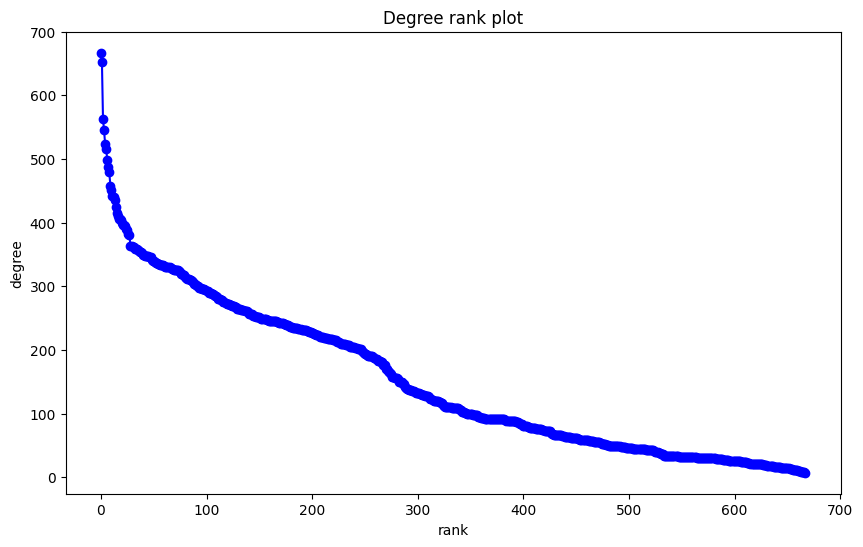

In [54]:
# get degree distribution
degree_sequence = sorted([d for n, d in anime_G.degree()], reverse=True)

# plot degree distribution
plt.figure(figsize=(10, 6))
plt.plot(degree_sequence, 'b-', marker='o')
# add the name to the highest degree
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

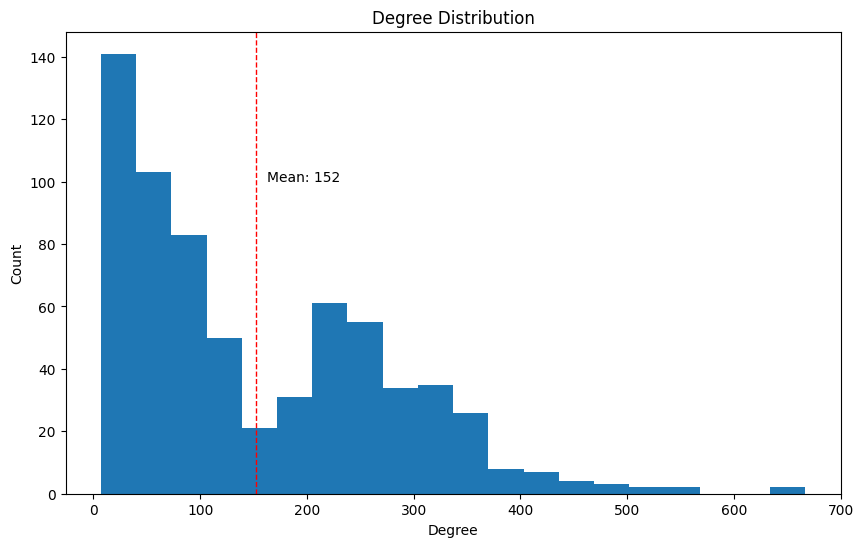

In [55]:
# make histogram of degree distribution w. mean
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=20)
plt.axvline(np.mean(degree_sequence), color='r', linestyle='dashed', linewidth=1)
plt.text(np.mean(degree_sequence) + 10, 100, 'Mean: {:.0f}'.format(np.mean(degree_sequence)))
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [56]:
# find best partition
import community as community_louvain
partition = community_louvain.best_partition(anime_G)

In [57]:
# set the group attribute
set_group(anime_G, partition)

In [58]:
network, config = nw.visualize(anime_G)

In [59]:
# identify the ten pokemon with the highest degree
sorted_degree = sorted(anime_G.degree, key=lambda x: x[1], reverse=True)
sorted_degree[:10]

[('Pikachu', 667),
 ('Rotom', 652),
 ('Grookey', 563),
 ('Meowth', 545),
 ('Wobbuffet', 524),
 ('Cinderace', 516),
 ('Lucario', 499),
 ('Dragonite', 487),
 ('Eevee', 479),
 ('Yamper', 457)]

In [60]:
# save the graph to pickle
with open('anime_graph.pickle', 'wb') as f:
    pickle.dump(anime_G, f)

## Time to analyze the graph

In [61]:
# get degree assortativity
nx.degree_assortativity_coefficient(anime_G)

-0.15953836848457162

In [62]:
def calc_frac(graph, fields):
    """ Calculate the fraction of neighbors with the same field as the node itself."""
    fracs = []
    for node in graph.nodes:
        c = 0
        for neighbor in graph.neighbors(node):
            if fields[neighbor] == fields[node]:
                c += 1
        fracs.append(c/graph.degree(node))

    return np.mean(fracs)

def frac_same_field(graph, field):
    fields = nx.get_node_attributes(graph, field)
    return calc_frac(graph, fields)

In [63]:
avg_typing = frac_same_field(anime_G, 'typing')
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_typing*100:.2f}%")

avg_abilities = frac_same_field(anime_G, 'abilities')
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_abilities*100:.2f}%")

avg_egg_groups = frac_same_field(anime_G, 'egg_groups')
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_egg_groups*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 4.31%
The average fraction of neighbors with the same ability as the node itself is 0.67%
The average fraction of neighbors with the same egg group as the node itself is 8.42%


Now, we mix up association and check again

In [64]:
import random
random.seed(42)

# We implment a function that randomly assigns fields to nodes
def frac_rand_graph(graph, field):
    fields = nx.get_node_attributes(graph, field)
    field_list = list(fields.values())
    for key in fields.keys():
        fields[key] = random.choice(field_list)

    return calc_frac(graph, fields)

In [67]:
avg_rand_type = frac_rand_graph(anime_G, 'typing')
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_rand_type*100:.2f}%")

avg_rand_abilities = frac_rand_graph(anime_G, 'abilities')
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_rand_abilities*100:.2f}%")

avg_rand_egg_groups = frac_rand_graph(anime_G, 'egg_groups')
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_rand_egg_groups*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 2.75%
The average fraction of neighbors with the same ability as the node itself is 0.33%
The average fraction of neighbors with the same egg group as the node itself is 6.27%


In [66]:
# now, we repeat the above 1000 times and calculate the average fraction of neighbors with the same field as the node itself
avg_rand_type_100 = [frac_rand_graph(anime_G, 'typing') for _ in range(1000)]
avg_rand_type_100_mu = np.mean(avg_rand_type_100)
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_rand_type_100_mu*100:.2f}%")

avg_rand_abilities_100 = [frac_rand_graph(anime_G, 'abilities') for _ in range(1000)]
avg_rand_abilities_100_mu = np.mean(avg_rand_abilities_100)
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_rand_abilities_100_mu*100:.2f}%")

avg_rand_egg_groups_100 = [frac_rand_graph(anime_G, 'egg_groups') for _ in range(100)]
avg_rand_egg_groups_100_mu = np.mean(avg_rand_egg_groups_100)
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_rand_egg_groups_100_mu*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 2.78%
The average fraction of neighbors with the same ability as the node itself is 0.33%
The average fraction of neighbors with the same egg group as the node itself is 6.75%


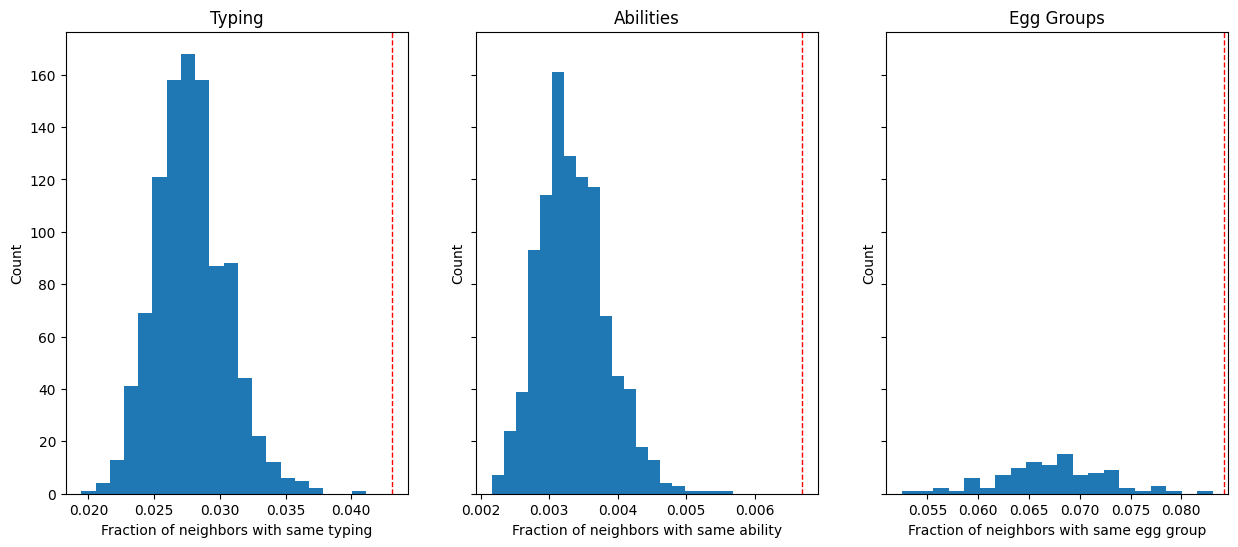

In [ ]:
# now we make three subplots of the random distributions with the actual values plotted as vertical lines
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
ax[0].hist(avg_rand_type_100, bins=20)
ax[0].axvline(avg_typing, color='r', linestyle='dashed', linewidth=1)
ax[0].set_title("Typing")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Fraction of neighbors with same typing")
ax[1].hist(avg_rand_abilities_100, bins=20)
ax[1].axvline(avg_abilities, color='r', linestyle='dashed', linewidth=1)
ax[1].set_title("Abilities")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Fraction of neighbors with same ability")
ax[2].hist(avg_rand_egg_groups_100, bins=20)
ax[2].axvline(avg_egg_groups, color='r', linestyle='dashed', linewidth=1)
ax[2].set_title("Egg Groups")
ax[2].set_ylabel("Count")
ax[2].set_xlabel("Fraction of neighbors with same egg group")
plt.show()

Hence, we see that typing, ability and egg group is not entirely random. This might be caused by the fact that Pokémon in the same families (evolution lines) are more likely to appear in the same episodes.

Next, we will look at the degree assortativity

In [68]:
dac = nx.degree_assortativity_coefficient(anime_G)
print(f"The degree assortativity coefficient is {dac:.2f}")

The degree assortativity coefficient is -0.16


This tells us that high degree Pokemon are actually less likely to be connected to other high degree pokemon.

Next, we will look at partitions and modularity

In [69]:
# find best partition
partition = community_louvain.best_partition(anime_G)

# find modularity
mod = community_louvain.modularity(partition, anime_G)
print(f"The modularity of the partition is {mod:.2f}")

The modularity of the partition is 0.20


In [70]:
# list number of communities
num_communities = len(set(partition.values()))
print(f"There are {num_communities} communities")

# Community sizes
community_sizes = [len(list(filter(lambda x: x[1] == i, partition.items()))) for i in range(num_communities)]
print(f"The community sizes are {community_sizes}")

There are 5 communities
The community sizes are [138, 102, 275, 131, 22]


## 3rd attempt at making graphs

In [88]:
season_dict = {
    'Indigo League': 'EP',
    'Adventures on the Orange Islands': 'EP',
    'The Johto Journeys': 'EP',
    'Hoenn': 'AG',
    'Battle Frontier': 'AG',
    'Diamond and Pearl': 'DP',
    'Black and White': 'BW',
    'XY': 'XY',
    'Sun and Moon': 'SM',
    'Pocket Monsters': 'JN'
}

def make_number(num):
    if num < 10:
        return '00' + str(num)
    elif num < 100:
        return '0' + str(num)
    else:
        return str(num)


def get_pokemon_data(episode, names, season):
    lookup = season_dict[season]
    r = requests.get(os.path.join('https://bulbapedia.bulbagarden.net/wiki', lookup + episode)).text
    soup = BeautifulSoup(r, 'html.parser')
    elems = soup.find_all('a', href=True)
    episode_pokemon = []

    for name in names:
        for elem in elems:
            if name in elem.text:
                text = elem.text
                episode_pokemon.append(text)

    unique_pokemon = list(set(episode_pokemon))

    # remove elements that are not single words
    unique_pokemon = [p for p in unique_pokemon if len(p.split()) == 1]

    # remove nature names
    if 'Nature' in unique_pokemon:
        unique_pokemon.remove('Nature')
    return unique_pokemon


# get episode plots
def get_episode_plot(episode, season):
    lookup = season_dict[season]
    r = requests.get(os.path.join('https://bulbapedia.bulbagarden.net/wiki', lookup + episode)).text
    soup = BeautifulSoup(r, 'html.parser')
    elems = soup.find_all('p')
    plot = ''
    for i in range(1,len(elems)):
        if "Who's That Pokémon?" in elems[i].text:
            break
        plot += elems[i].text

    #plot = plot.replace('\n ', ' ')
    plot = plot.replace('\n', ' ')

    # remove trailing whitespace
    plot = plot.strip()
    
    return plot

def gather_pokemon_data(episode_numbers, names, season):
    episode_dict = {}
    for episode in tqdm(episode_numbers):
        episode_pokemon = get_pokemon_data(episode, names, season)
        plot = get_episode_plot(episode, season)
        episode_dict[episode] = []
        episode_dict[episode].append(episode_pokemon)
        episode_dict[episode].append(plot)
    return episode_dict

In [77]:
names = poke_df_clean['pokemon'].values.tolist()

In [78]:
if not os.path.exists('indigo_df.pkl'):
    episode_numbers_indigo_league = [make_number(i) for i in range(1, 81)]
    indigo_dict = gather_pokemon_data(episode_numbers_indigo_league, names, 'Indigo League')
    indigo_df = pd.DataFrame.from_dict(indigo_dict, orient='index', columns=['pokemon', 'plot'])
    indigo_df.to_pickle('indigo_df.pkl')
else:
    indigo_df = pd.read_pickle('indigo_df.pkl')


100%|██████████| 80/80 [02:01<00:00,  1.52s/it]


In [79]:
if not os.path.exists('orange_df.pkl'):
    episode_numbers_orange_islands = [make_number(i) for i in range(81, 117)]
    orange_dict = gather_pokemon_data(episode_numbers_orange_islands, names, 'Adventures on the Orange Islands')
    orange_df = pd.DataFrame.from_dict(orange_dict, orient='index', columns=['pokemon', 'plot'])
    orange_df.to_pickle('orange_df.pkl')
else:
    orange_df = pd.read_pickle('orange_df.pkl')

100%|██████████| 35/35 [00:45<00:00,  1.31s/it]


In [82]:
if not os.path.exists('johto_df.pkl'):
    episode_numbers_johto_journeys = [make_number(i) for i in range(117, 275)]
    johto_dict = gather_pokemon_data(episode_numbers_johto_journeys, names, 'The Johto Journeys')
    johto_df = pd.DataFrame.from_dict(johto_dict, orient='index', columns=['pokemon', 'plot'])
    johto_df.to_pickle('johto_df.pkl')
else:
    johto_df = pd.read_pickle('johto_df.pkl')

100%|██████████| 158/158 [03:43<00:00,  1.41s/it]


In [84]:
if not os.path.exists('hoenn_df.pkl'):
    episode_numbers_hoenn_league = [make_number(i) for i in range(1, 135)]
    hoenn_dict = gather_pokemon_data(episode_numbers_hoenn_league, names, 'Hoenn')
    hoenn_df = pd.DataFrame.from_dict(hoenn_dict, orient='index', columns=['pokemon', 'plot'])
    hoenn_df.to_pickle('hoenn_df.pkl')
else:
    hoenn_df = pd.read_pickle('hoenn_df.pkl')

100%|██████████| 134/134 [03:16<00:00,  1.47s/it]


In [85]:
if not os.path.exists('battle_df.pkl'):
    episode_numbers_battle_frontier = [make_number(i) for i in range(135, 193)]
    battle_dict = gather_pokemon_data(episode_numbers_battle_frontier, names, 'Battle Frontier')
    battle_df = pd.DataFrame.from_dict(battle_dict, orient='index', columns=['pokemon', 'plot'])
    battle_df.to_pickle('battle_df.pkl')
else:
    battle_df = pd.read_pickle('battle_df.pkl')

100%|██████████| 58/58 [01:26<00:00,  1.49s/it]


In [90]:
if not os.path.exists('diamond_df.pkl'):
    episode_numbers_diamond_pearl = [make_number(i) for i in range(1, 192)]
    diamond_dict = gather_pokemon_data(episode_numbers_diamond_pearl, names, 'Diamond and Pearl')
    diamond_df = pd.DataFrame.from_dict(diamond_dict, orient='index', columns=['pokemon', 'plot'])
    diamond_df.to_pickle('diamond_df.pkl')
else:
    diamond_df = pd.read_pickle('diamond_df.pkl')

In [92]:
if not os.path.exists('black_df.pkl'):
    episode_numbers_black_white = [make_number(i) for i in range(1, 143)]
    black_dict = gather_pokemon_data(episode_numbers_black_white, names, 'Black and White')
    black_df = pd.DataFrame.from_dict(black_dict, orient='index', columns=['pokemon', 'plot'])
    black_df.to_pickle('black_df.pkl')
else:
    black_df = pd.read_pickle('black_df.pkl')

100%|██████████| 142/142 [04:03<00:00,  1.72s/it]


In [93]:
if not os.path.exists('xy_df.pkl'):
    episode_numbers_xy = [make_number(i) for i in range(1, 141)]
    xy_dict = gather_pokemon_data(episode_numbers_xy, names, 'XY')
    xy_df = pd.DataFrame.from_dict(xy_dict, orient='index', columns=['pokemon', 'plot'])
    xy_df.to_pickle('xy_df.pkl')
else:
    xy_df = pd.read_pickle('xy_df.pkl')

100%|██████████| 140/140 [04:35<00:00,  1.97s/it]


In [94]:
if not os.path.exists('sun_df.pkl'):
    episode_numbers_sun_moon = [make_number(i) for i in range(1, 147)]
    sun_dict = gather_pokemon_data(episode_numbers_sun_moon, names, 'Sun and Moon')
    sun_df = pd.DataFrame.from_dict(sun_dict, orient='index', columns=['pokemon', 'plot'])
    sun_df.to_pickle('sun_df.pkl')
else:
    sun_df = pd.read_pickle('sun_df.pkl')

100%|██████████| 146/146 [04:10<00:00,  1.71s/it]


In [95]:
if not os.path.exists('pocket_monsters.pkl'):
    episode_numbers_pocket_monsters = [make_number(i) for i in range(1, 148)]
    pocket_dict = gather_pokemon_data(episode_numbers_pocket_monsters, names, 'Pocket Monsters')
    pocket_df = pd.DataFrame.from_dict(pocket_dict, orient='index', columns=['pokemon', 'plot'])
    pocket_df.to_pickle('pocket_monsters.pkl')
else:
    pocket_df = pd.read_pickle('pocket_monsters.pkl')

100%|██████████| 147/147 [03:42<00:00,  1.52s/it]


In [97]:
# collect all the dataframes into one
frames = [indigo_df, orange_df, johto_df, hoenn_df, battle_df, diamond_df, black_df, xy_df, sun_df, pocket_df]

# add a column for the season
for i in range(len(frames)):
    frames[i]['season'] = i + 1

In [100]:
# combine all the dataframes
all_seasons_df = pd.concat(frames)

In [102]:
if not os.path.exists('all_seasons_df.pkl'):
    all_seasons_df.to_pickle('all_seasons_df.pkl')
else:
    all_seasons_df = pd.read_pickle('all_seasons_df.pkl')

In [103]:
# time to create a graph for each season
def make_anime_edgelist(df):
    from collections import defaultdict
    edgelist = defaultdict(lambda: 0)
    # loop over all episodes
    for i in tqdm(range(len(df))):
        # loop over all pokemon in the episode
        for j in range(len(df['pokemon'].iloc[i])):
            for k in range(j+1, len(df['pokemon'].iloc[i])):
                edgelist[(df['pokemon'].iloc[i][j], df['pokemon'].iloc[i][k])] += 1
                edgelist[(df['pokemon'].iloc[i][k], df['pokemon'].iloc[i][j])] += 1

    # make the edgelist undirected 
    edgelist = [(k[0], k[1], v) for k, v in edgelist.items()]

    # only keep every other edge to avoid duplicates
    edgelist = edgelist[::2]
    return edgelist

In [104]:
indigo_G = nx.Graph()
indigo_G.add_weighted_edges_from(make_anime_edgelist(indigo_df))

orange_G = nx.Graph()
orange_G.add_weighted_edges_from(make_anime_edgelist(orange_df))

johto_G = nx.Graph()
johto_G.add_weighted_edges_from(make_anime_edgelist(johto_df))

hoenn_G = nx.Graph()
hoenn_G.add_weighted_edges_from(make_anime_edgelist(hoenn_df))

battle_G = nx.Graph()
battle_G.add_weighted_edges_from(make_anime_edgelist(battle_df))

diamond_G = nx.Graph()
diamond_G.add_weighted_edges_from(make_anime_edgelist(diamond_df))

black_G = nx.Graph()
black_G.add_weighted_edges_from(make_anime_edgelist(black_df))

xy_G = nx.Graph()
xy_G.add_weighted_edges_from(make_anime_edgelist(xy_df))

sun_G = nx.Graph()
sun_G.add_weighted_edges_from(make_anime_edgelist(sun_df))

pocket_G = nx.Graph()
pocket_G.add_weighted_edges_from(make_anime_edgelist(pocket_df))

100%|██████████| 147/147 [00:03<00:00, 38.14it/s]


In [108]:
nw.visualize(diamond_G)

(None, None)

In [109]:
# make graph for all seasons
all_seasons_G = nx.Graph()
all_seasons_G.add_weighted_edges_from(make_anime_edgelist(all_seasons_df))

100%|██████████| 1231/1231 [00:15<00:00, 81.71it/s]


In [129]:
# make a dataframe with only the pokemon that appear in the anime
if not os.path.exists('anime_pokemon_all_seasons.pickle'):
    anime_pokemon_all_seasons = find_unique(all_seasons_df, 'pokemon')
    anime_pokemon_all_seasons_df = poke_df_clean[poke_df_clean['pokemon'].isin(anime_pokemon_all_seasons)].reset_index(drop=True)
    anime_pokemon_all_seasons_df.to_pickle('anime_pokemon_all_seasons.pickle')
else:
    anime_pokemon_all_seasons_df = pd.read_pickle('anime_pokemon_all_seasons.pickle')

In [138]:
# remove all nodes that are not in the anime pokemon dataframe
pokemon = anime_pokemon_all_seasons_df['pokemon'].values.tolist()
all_seasons_G.remove_nodes_from([n for n in all_seasons_G.nodes() if n not in pokemon])

In [139]:
types = [t for t in anime_pokemon_all_seasons_df['types'].values]
type_dict = dict(zip(anime_pokemon_all_seasons_df['pokemon'], types))

abilities = [a for a in anime_pokemon_all_seasons_df['abilities'].values]
ability_dict = dict(zip(anime_pokemon_all_seasons_df['pokemon'], abilities))

egg_groups = [e for e in anime_pokemon_all_seasons_df['egg_groups'].values]
egg_group_dict = dict(zip(anime_pokemon_all_seasons_df['pokemon'], egg_groups))

nx.set_node_attributes(all_seasons_G, type_dict, 'type')
nx.set_node_attributes(all_seasons_G, ability_dict, 'ability')
nx.set_node_attributes(all_seasons_G, egg_group_dict, 'egg_group')

### Analysis

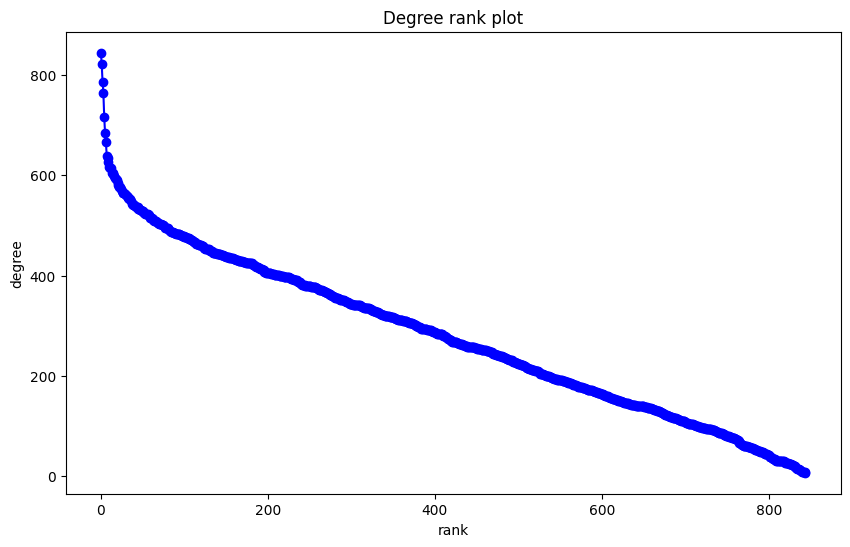

In [140]:
# get degree distribution
degree_sequence = sorted([d for n, d in all_seasons_G.degree()], reverse=True)

# plot degree distribution
plt.figure(figsize=(10, 6))
plt.plot(degree_sequence, 'b-', marker='o')
# add the name to the highest degree
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

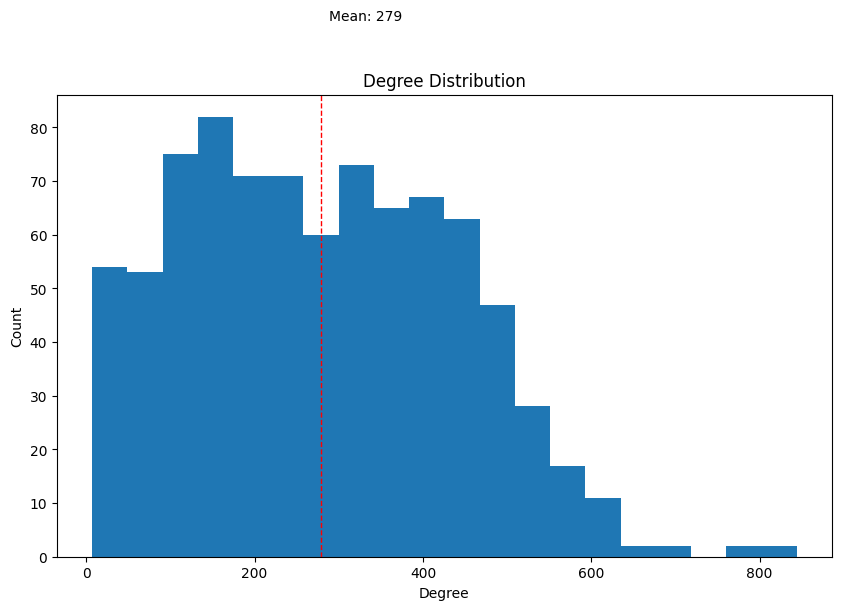

In [141]:
# make histogram of degree distribution w. mean
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=20)
plt.axvline(np.mean(degree_sequence), color='r', linestyle='dashed', linewidth=1)
plt.text(np.mean(degree_sequence) + 10, 100, 'Mean: {:.0f}'.format(np.mean(degree_sequence)))
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [142]:
# identify the ten pokemon with the highest degree
sorted_degree = sorted(all_seasons_G.degree, key=lambda x: x[1], reverse=True)
sorted_degree[:10]

[('Pikachu', 844),
 ('Meowth', 821),
 ('Wobbuffet', 786),
 ('Rotom', 763),
 ('Eevee', 716),
 ('Charizard', 684),
 ('Psyduck', 666),
 ('Dragonite', 639),
 ('Lucario', 634),
 ('Bulbasaur', 626)]

In [143]:
# get degree assortativity
nx.degree_assortativity_coefficient(all_seasons_G)

-0.09585841052785056

In [144]:
def calc_frac(graph, fields):
    """ Calculate the fraction of neighbors with the same field as the node itself."""
    fracs = []
    for node in graph.nodes:
        c = 0
        for neighbor in graph.neighbors(node):
            if fields[neighbor] == fields[node]:
                c += 1
        fracs.append(c/graph.degree(node))

    return np.mean(fracs)

def frac_same_field(graph, field):
    fields = nx.get_node_attributes(graph, field)
    return calc_frac(graph, fields)

In [150]:
avg_typing = frac_same_field(all_seasons_G, 'type')
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_typing*100:.2f}%")

avg_abilities = frac_same_field(all_seasons_G, 'ability')
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_abilities*100:.2f}%")

avg_egg_groups = frac_same_field(all_seasons_G, 'egg_group')
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_egg_groups*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 3.70%
The average fraction of neighbors with the same ability as the node itself is 0.66%
The average fraction of neighbors with the same egg group as the node itself is 8.22%


Now, we mix up association and check again

In [146]:
import random
random.seed(42)

# We implment a function that randomly assigns fields to nodes
def frac_rand_graph(graph, field):
    fields = nx.get_node_attributes(graph, field)
    field_list = list(fields.values())
    for key in fields.keys():
        fields[key] = random.choice(field_list)

    return calc_frac(graph, fields)

In [151]:
avg_rand_type = frac_rand_graph(all_seasons_G, 'type')
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_rand_type*100:.2f}%")

avg_rand_abilities = frac_rand_graph(all_seasons_G, 'ability')
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_rand_abilities*100:.2f}%")

avg_rand_egg_groups = frac_rand_graph(all_seasons_G, 'egg_group')
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_rand_egg_groups*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 2.81%
The average fraction of neighbors with the same ability as the node itself is 0.37%
The average fraction of neighbors with the same egg group as the node itself is 6.27%


In [152]:
# now, we repeat the above 1000 times and calculate the average fraction of neighbors with the same field as the node itself
avg_rand_type_100 = [frac_rand_graph(all_seasons_G, 'type') for _ in range(1000)]
avg_rand_type_100_mu = np.mean(avg_rand_type_100)
print(f"The average fraction of neighbors with the same typing as the node itself is {avg_rand_type_100_mu*100:.2f}%")

avg_rand_abilities_100 = [frac_rand_graph(all_seasons_G, 'ability') for _ in range(1000)]
avg_rand_abilities_100_mu = np.mean(avg_rand_abilities_100)
print(f"The average fraction of neighbors with the same ability as the node itself is {avg_rand_abilities_100_mu*100:.2f}%")

avg_rand_egg_groups_100 = [frac_rand_graph(all_seasons_G, 'egg_group') for _ in range(100)]
avg_rand_egg_groups_100_mu = np.mean(avg_rand_egg_groups_100)
print(f"The average fraction of neighbors with the same egg group as the node itself is {avg_rand_egg_groups_100_mu*100:.2f}%")

The average fraction of neighbors with the same typing as the node itself is 2.58%
The average fraction of neighbors with the same ability as the node itself is 0.34%
The average fraction of neighbors with the same egg group as the node itself is 6.77%


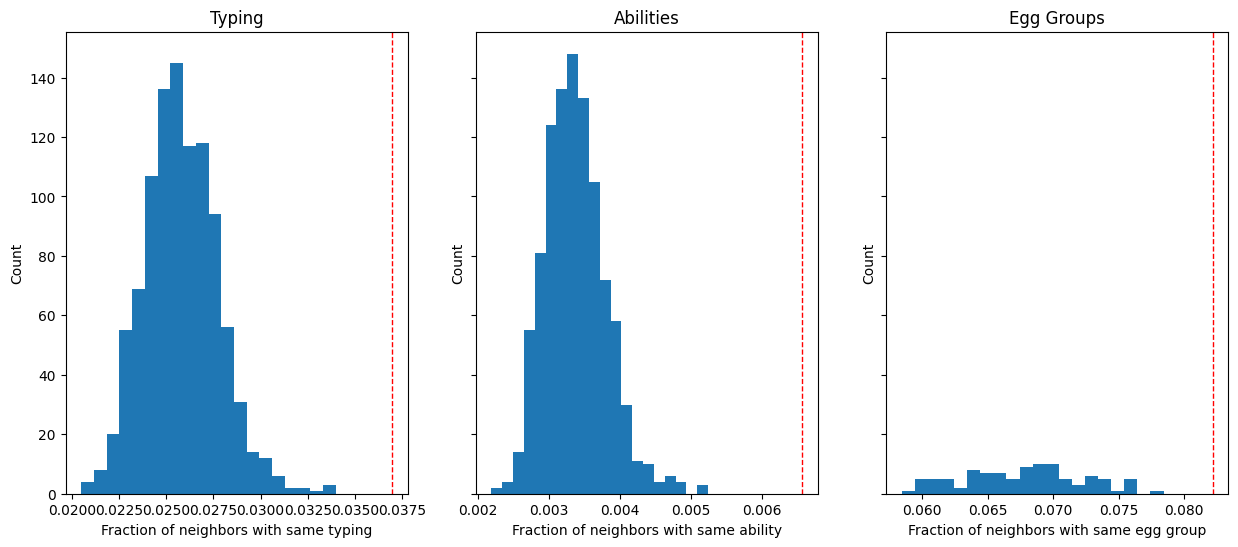

In [153]:
# now we make three subplots of the random distributions with the actual values plotted as vertical lines
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
ax[0].hist(avg_rand_type_100, bins=20)
ax[0].axvline(avg_typing, color='r', linestyle='dashed', linewidth=1)
ax[0].set_title("Typing")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Fraction of neighbors with same typing")
ax[1].hist(avg_rand_abilities_100, bins=20)
ax[1].axvline(avg_abilities, color='r', linestyle='dashed', linewidth=1)
ax[1].set_title("Abilities")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Fraction of neighbors with same ability")
ax[2].hist(avg_rand_egg_groups_100, bins=20)
ax[2].axvline(avg_egg_groups, color='r', linestyle='dashed', linewidth=1)
ax[2].set_title("Egg Groups")
ax[2].set_ylabel("Count")
ax[2].set_xlabel("Fraction of neighbors with same egg group")
plt.show()

Hence, we see that typing, ability and egg group is not entirely random. This might be caused by the fact that Pokémon in the same families (evolution lines) are more likely to appear in the same episodes.

Next, we will look at the degree assortativity

In [155]:
dac = nx.degree_assortativity_coefficient(all_seasons_G)
print(f"The degree assortativity coefficient is {dac:.2f}")

The degree assortativity coefficient is -0.10


This tells us that high degree Pokemon are actually less likely to be connected to other high degree pokemon.

Next, we will look at partitions and modularity

In [156]:
# find best partition
partition = community_louvain.best_partition(all_seasons_G)

# find modularity
mod = community_louvain.modularity(partition, all_seasons_G)
print(f"The modularity of the partition is {mod:.2f}")

The modularity of the partition is 0.22


In [157]:
# list number of communities
num_communities = len(set(partition.values()))
print(f"There are {num_communities} communities")

# Community sizes
community_sizes = [len(list(filter(lambda x: x[1] == i, partition.items()))) for i in range(num_communities)]
print(f"The community sizes are {community_sizes}")

There are 5 communities
The community sizes are [246, 207, 138, 141, 113]


In [158]:
# find communities
import community as community_louvain
communities = community_louvain.best_partition(all_seasons_G)
set_group(all_seasons_G, communities)


In [159]:
nw.visualize(all_seasons_G)

(None, None)

In [165]:
# we use network x to do double edge swaps
# we use the same seed as before to ensure reproducibility
def modularity_test(graph, nswap, max_tries):
    temp_graph = nx.double_edge_swap(graph, nswap=nswap, max_tries=1000000)
    partition = community_louvain.best_partition(temp_graph)
    return community_louvain.modularity(partition, temp_graph)

In [168]:
mods = []
for _ in tqdm(range(100)):
    mods.append(modularity_test(all_seasons_G, all_seasons_G.number_of_edges()/2, 1000000))

100%|██████████| 100/100 [20:25<00:00, 12.25s/it]


In [1]:
mods

NameError: name 'mods' is not defined